<a href="https://colab.research.google.com/github/silviutroscot/Signal-Processing-Playground/blob/master/Haar_Bases_for_Image_Compression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [43]:
from google.colab import drive
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import IPython
from IPython.display import Image
import math
from __future__ import print_function

drive.mount('/content/drive')

# ensure all images will be grayscale
gray();

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


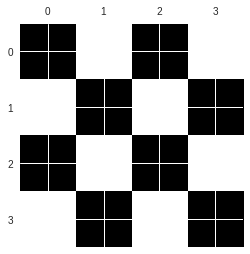

In [36]:
# create a checkerboard pattern
k_size = 4
img = np.zeros((k_size, k_size))
for n in range(0, k_size):
    for m in range(0, k_size):
        if ((n + m) % 2 != 0):
            img[n, m] = 255

# now display the matrix as an image
plt.matshow(img)

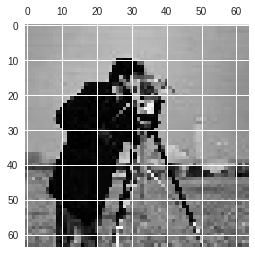

In [57]:
# upload image from drive

with open ('drive/My Drive/collabFiles/cameraman.jpg', 'rb') as image:
  img = np.array(plt.imread(image), dtype=int)

plt.matshow(img)
plt.show()

# The canonical basis
A canonical basis for a space $R^{M*N}$ is a set of matrices is a set of matrices where only one element is 1 and the others are 0.

In [0]:
def construct_canonical_basis(M, N):
  canonical_basis = []
  for i in range (0, M*N):
    basis_element = np.zeros((M, N))
    basis_element[(i % M), int(i/M)] = 1
    canonical_basis.append(basis_element)
    
  canonical_basis = np.asarray(canonical_basis)
  return canonical_basis

print (construct_canonical_basis(3,4))

## To transmit the image we would only need to transmit the coefficients of the decomposition of the image over a 64x64 basis.
This involves sending 64*64=4096 coefficients over the network. Now, if something happens and we were able to send only half of the coefficients over the network, the result is very bad.

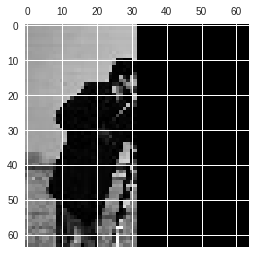

In [72]:
flatened_img = np.ravel(img, 'F')
flatened_img[int(len(flatened_img)/2):] = 0

# rebuild matrix
reshaped_img = np.reshape(flatened_img, (64, 64), 'F')
plt.matshow(reshaped_img)